# 1.4 Pandas & Dataframes

**step 8**: Какие способы позволяют отобрать 7 первых строк датафрэйма df?

- [x] df.iloc[0:7]<br>
- [x] df.head(7)<br>
- [ ] df.tail(7)<br>
- [ ] df.loc[:7], если индекс представляет собой последовательность чисел от 0 с шагом 1<br>
- [x] df.loc[:6], если индекс представляет собой последовательность чисел от 0 с шагом 1<br>
- [x] df.iloc[:7]

**step 9**: Cоответствие атрибутов и методов датафрэйма с их значением
df.size - возвращает число ячеек (число строк, умноженное на число столбцов) в df
df.columns - возвращает коллекцию с названиями колонок
df.get_dtype_counts() - возвращает серию с числом колонок каждого из типов
df.index - возвращает коллекцию с индексом всех строк
df.dtypes - возвращает серию с описанием типа каждой колонки
df.select_dtypes(include=types_to_include, exclude=types_to_exclude) - возвращает часть датафрэйма, куда были включены колонки с типами, указанными в include, или исключены колонки с типами, указанными в exclude
df.shape - возвращает кортеж из числа строк и столбцов у df

**step 10**: А теперь используем эти методы на знаменитом [титаническом датасэте](https://stepik.org/media/attachments/course/4852/titanic.csv)! Загрузите датасэт, посмотрите на датафрэйм и ответьте на вопросы:

In [2]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('titanic.csv')
print(titanic.shape)
titanic.get_dtype_counts()

(891, 12)


float64    2
int64      5
object     5
dtype: int64

**ответы**<br>
Число колонок в представленном датафрэйме: **12**<br>
число строк: **891**<br>
float: **2 колонки**<br>
int: **5 колонок**<br>
object: **5 колонок**<br>

## 1.5 Фильтрация данных

**step 4**: Аналитик Ярослав захотел отфильтровать данные по комбинации условий и отобрать только те наблюдения, у которых значение по переменной writing score >  100, а значение переменной gender == female. Для этого Ярослав написал следующий запрос: 

`
students_performance[students_performance['writing score'] > 100 and students_performance.gender == 'female']
`

Однако в результате получил такую ошибку:

**Truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()**

Ошибки являются важной и неотъемлемой частью обучения. Не бойтесь, что поначалу большая часть ваших запросов будет завершаться чем-то подобным. Уметь находить причину ошибки - очень ценный навык. Во-первых, можно разобраться самому, но не менее полезно обратиться за помощью к более опытным коллегам. Давайте проверим, сталкивался кто-либо с подобной проблемой? 

Запрос в гугл с текстом ошибки сразу же приводит нас на https://stackoverflow.com. Обещаю, вы полюбите этот сайт!)

Итак, давайте разберемся в чем же была проблема с запросом Ярослава? Изучите обсуждение этой проблемы на stackoverflow.com.

**ответ**:
- [x] Нужно указать приоритет операций, взяв условия в скобки [(condition) и (condition)]<br>
- [ ] Pandas dataframe не поддерживает объединение условий, сначала нужно сделать фильтр по первому условию, затем по второму<br>
- [x] При работе с pandas series для логического И нужно использовать & вместо уже знакомого and><br>
- [ ] Нельзя отобрать нужные строки просто указав условие в квадратных скобках, обязательно нужно использовать loc

**step 6**: У какой доли студентов из [датасэта](https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv) в колонке lunch указано free/reduced? Формат ответа десятичная дробь, например, 0.25

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
len(df.loc[df['lunch']=='free/reduced'])/len(df)

0.355

**step 7**: Как различается среднее и дисперсия оценок по предметам у групп студентов со стандартным или урезанным ланчем?

In [8]:
df.groupby('lunch').agg(['mean', 'var'])

math score             reading score             writing score  \
                   mean         var          mean         var          mean   
lunch                                                                         
free/reduced  58.921127  229.824270     64.653521  221.871139     63.022535   
standard      70.034109  186.418089     71.654264  191.285560     70.823256   

                          
                     var  
lunch                     
free/reduced  238.202881  
standard      205.620887

**ответ**<br>
- [x] дисперсия оценок студентов со стандартным ланчем меньше<br>
- [ ] дисперсия оценок студентов с урезанным ланчем меньше<br>
- [ ] студенты с урезанным ланчем имеют в среднем более хорошие оценки<br>
- [x] студенты со стандартным ланчем имеют в среднем более хорошие оценки<br>
- [ ] студенты со стандартным ланчем имеют в среднем оценки за математику лучше, но хуже за чтение и письмо<br>
- [ ] студенты с урезанным ланчем в среднем лучше успевают по математике и чтению<br>

Соотнесите строчку кода и результат её выполнения. Переменная student_stats содержит датафрэйм с [данными](https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv) о студентах. 

Чтобы было удобно, сойдёмся на одинаковых терминах<br>

parental level of education - уровень образования родителей<br>
bachelor's degree - бакалаврская степень<br>
master's degree - магистерская степень<br>
test preparation course - тест<br>
наблюдения, студенты, строки - одно и то же в данном случае<br>

**ответы**<br>
`student_stats[student_stats['parental level of education'].isin(["bachelor's degree", "master's degree"])]` - отберёт студентов, уровень образования родителей которых бакалавр или магистр

`student_stats[(student_stats['math score'] > 90) & (student_stats['reading score'] <=72)]` - наблюдения, оценка за математику которых выше 90 и за чтение меньше либо равна 72

`student_stats[student_stats['test preparation course'] != 'completed']` - студенты, не прошедшие тест

`student_stats.query("lunch == 'standard'")` - студенты со стандартным ланчем

**step 11**: Изучите документацию метода filter и укажите правильные утверждения. Также есть ещё похожий метод select_dtypes, отбирающий по типам колонок.

**ответы**<br>
- [x] Можно использовать только один из аргументов items, like, regex<br>
- [x] Аргумент like отбирает те лэйблы, где встречается поданное значение<br>
- [x] Аргумент regex отбирает лэйблы, подходящие к переданному паттерну<br>
- [x] Аргумент items отбирает лэйблы, переданные в коллекции в качестве значения<br>
- [x] Аргумент axis отвечает за то, какие лэйблы мы рассматриваем - индекс или колонки<br>

## 1.6 Группировка и агрегация

**step 5**: Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из [датасэта] (https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv) по числу их ног (колонка legs), и заполните их число в задании ниже. Данные взяты отсюда, на этом же сайте можно найти больше разнообразных данных по Dota2.

In [10]:
df = pd.read_csv('dota_hero_stats.csv')
df.aggregate({'legs': 'value_counts'}).sort_index()

,legs
0,11
2,95
4,7
6,3
8,1


**step 6**: К нам поступили [данные](https://stepik.org/media/attachments/course/4852/accountancy.csv) из бухгалтерии о заработках Лупы и Пупы за разные задачи! Посмотрите у кого из них больше средний заработок в различных категориях (колонка Type) и заполните таблицу, указывая исполнителя с большим заработком в каждой из категорий.

In [39]:
dt = pd.read_csv('accountancy.csv')
dt.groupby(['Executor','Type'])['Salary'].mean().unstack()

Type,A,B,C,D,E,F
Executor,,,,,,
Loopa,58.000000,145.166667,154.333333,137.714286,164.0,238.00
Pupa,160.833333,77.000000,74.500000,146.500000,131.2,136.25


**step 7**: Продолжим исследование героев Dota2. Сгруппируйте по колонкам attack_type и primary_attr и выберите самый распространённый набор характеристик.

In [37]:
dt = pd.read_csv('dota_hero_stats.csv')
dt.groupby(['attack_type','primary_attr']).count()

Unnamed: 0  id  legs  localized_name  name  roles
attack_type primary_attr                                                   
Melee       agi                   19  19    19              19    19     19
            int                    2   2     2               2     2      2
            str                   35  35    35              35    35     35
Ranged      agi                   18  18    18              18    18     18
            int                   40  40    40              40    40     40
            str                    3   3     3               3     3      3

**step 8**: Аспирант Ростислав изучает метаболом водорослей и получил такую [табличку](http://stepik.org/media/attachments/course/4852/algae.csv). В ней он записал вид каждой водоросли, её род (группа, объединяющая близкие виды), группа (ещё одно объединение водорослей в крупные фракции) и концентрации анализируемых веществ.

Помогите Ростиславу найти среднюю концентрацию каждого из веществ в каждом из родов (колонка genus)! Для этого проведите группировку датафрэйма, сохранённого в переменной concentrations, и примените метод, сохранив результат в переменной mean_concentrations.

In [14]:
concentrations = pd.read_csv('algae.csv')
mean_concentrations = concentrations.groupby('genus').mean()

**step 9**: Пользуясь предыдущими данными, укажите через пробел (без запятых) чему равны минимальная, средняя и максимальная концентрации аланина (alanin) среди видов рода Fucus. Округлите до 2-ого знака, десятичным разделителем является точка.

In [16]:
concentrations.query("genus == 'Fucus'").aggregate({'alanin': ['max','mean','min'] }).round(2)

,alanin
max,6.64
mean,3.57
min,0.35


**step 10**: Сгруппируйте данные по переменной group и соотнесите вопросы с ответами

In [18]:
concentrations.groupby('group') \
    .agg({'citrate': 'var', 'sucrose': lambda x: x.max() - x.min(), 'glucose': 'count'}) \
    .round(2)

,citrate,sucrose,glucose
group,,,
brown,5.47,5.19,6
green,3.95,3.26,3
red,NaN,0.00,1


**ответы**<br>
Размах (максимум - минимум) сахарозы в бурых, зелёных и красных водорослях - 5.19, 3.26, 0<br>
Число видов бурых, зелёных и красных водорослей - 6, 3, 1<br>
Дисперсия концентрации цитрата в бурых, зелёных и красных водорослях - 5.47, 3.95, NaN<br>

## 1.7 Визуализация, seaborn
**step 3**

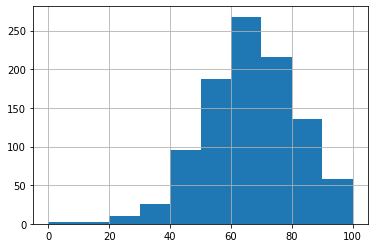

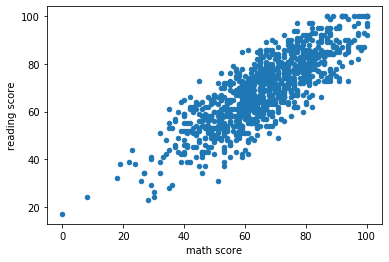

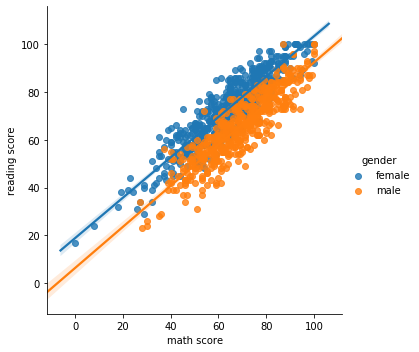

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

studs = pd.read_csv('StudentsPerformance.csv')
studs['math score'].hist()
studs.plot.scatter(x='math score',y='reading score')
sns.lmplot(x='math score',y='reading score', hue='gender', data=studs)

**step 5**: Представьте, что у вас есть [датафрэйм](https://stepik.org/media/attachments/course/4852/income.csv) df, хранящий данные о зарплате за месяц, со всего 1-ой колонкой income.
Укажите верные способы, как отрисовать простой график зависимости зарплаты от даты (то, как отображается дата сейчас не важно, главное сам график)

**ответы**<br>
- [x] sns.lineplot(x=df.index, y=df.income)<br>
- [x] df.plot(kind='line')<br>
- [x] df['income'].plot()<br>
- [x] df.plot()<br>
- [x] sns.lineplot(data=df)<br>
- [x] plt.plot(df.index, df.income)<br>
- [x] df.income.plot()<br>

**step 6**: Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-х переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

В ответе вы должны указать число кластеров в виде числа (например: 3).

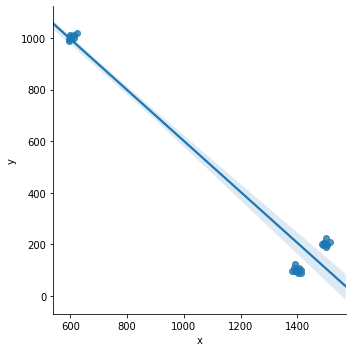

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('dataset_209770_6.txt', sep=' ')
sns.lmplot(x='x',y='y', data=df)

**step 7**: Скачайте [данные](https://stepik.org/media/attachments/course/4852/genome_matrix.csv), представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным.

Чтобы график отображался как на картинках, добавьте:<br>
```
g = # ваш код для создания теплокарты, укажите параметр cmap=viridis для той же цветовой схемы
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)
```

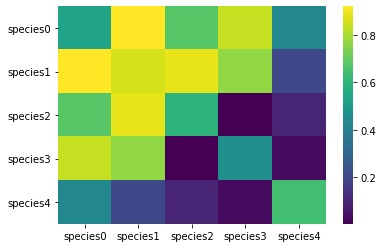

In [21]:
df = pd.read_csv('genome_matrix.csv', index_col=0)
sns.heatmap(data=df, cmap='viridis')

**step 8**: Пришло время узнать, какая роль в dota самая распространённая. Скачайте [датасэт](https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv) с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

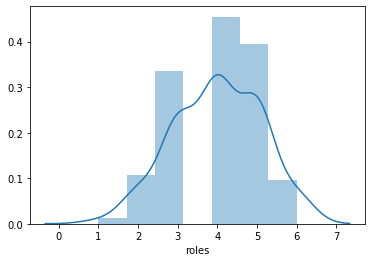

In [22]:
dt = pd.read_csv('dota_hero_stats.csv')
ds = dt['roles'].agg(lambda x: len(x.split(',')))
sns.distplot(ds)

**ответ**
4

**step 9**: Теперь перейдём к [цветочкам](https://stepik.org/media/attachments/course/4852/iris.csv). Магистрантка Адель решила изучить какие бывают ирисы. Помогите Адель узнать об ирисах больше - скачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.

Распределение должно быть по всем образцам, без разделения на вид.

Ссылки для изучения:<br>
[kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)<br>
[distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

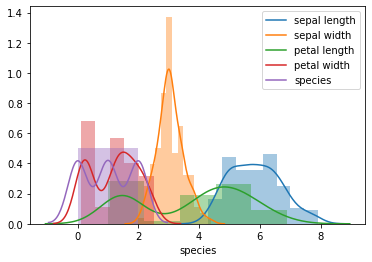

In [23]:
dt = pd.read_csv('iris.csv', index_col=0)
for col in dt:
    sns.distplot(dt[col], kde_kws={"label":col})

**ответы**
- [ ] Sepal width и sepal length имеют бимодальное распределение<br>
- [x] Petal width и petal length имеют бимодальное распределение<br>
- [x] Sepal width и sepal length имеют унимодальное распределение<br>
- [ ] Petal width и petal length имеют унимодальное распределение<br>
- [x] Petal length имеет наибольший размах значений<br>

**step 10**: Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin плотом. Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью violin плота и выберите правильный (такой же) вариант среди предложенных

[Мануал по рисованию violin плотов](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

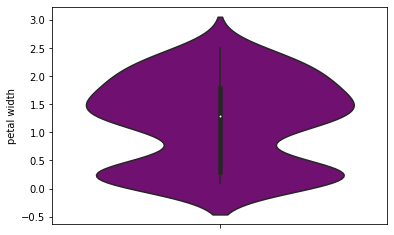

In [25]:
sns.violinplot(dt['petal width'], orient='v', color='Purple')

**step 11**: Продолжаем изучение ирисов! Ещё один важный тип графиков - pairplot, отражающий зависимость пар переменных друг от друга, а также распределение каждой из переменных. Постройте его и посмотрите на scatter плоты для каждой из пар фичей. Какая из пар навскидку имеет наибольшую корреляцию?

Также обратите внимание, что можно разделить на группы с помощью параметра hue.

Ссылки для изучения: [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

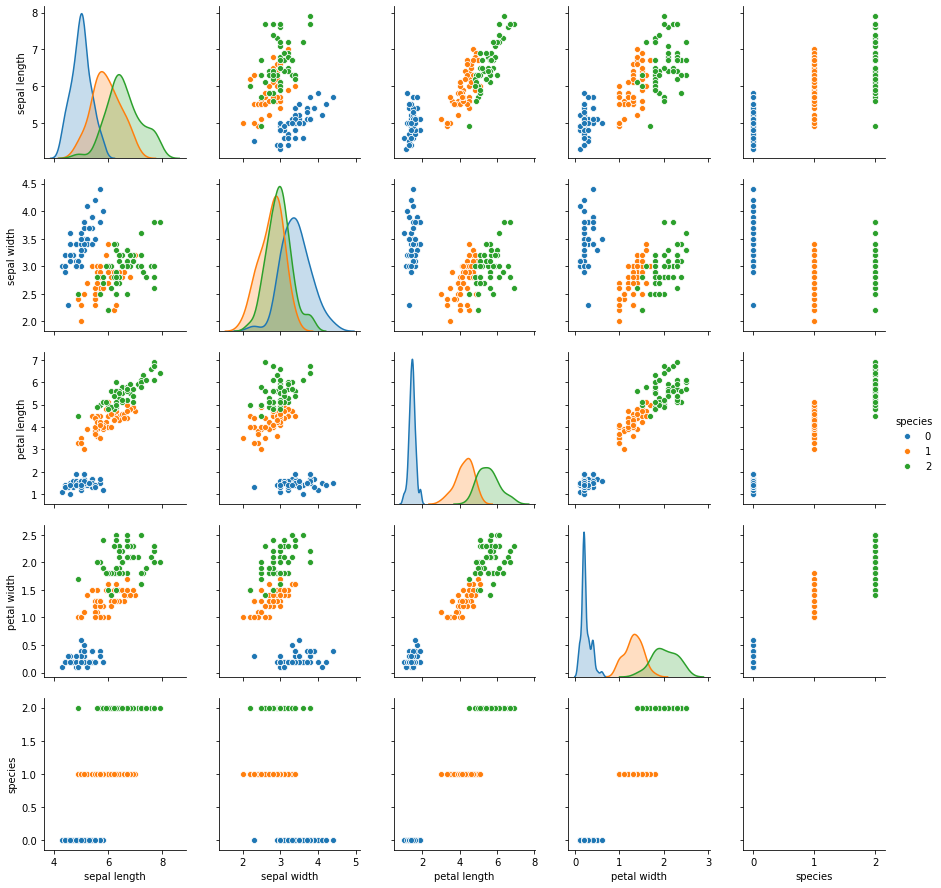

In [28]:
dt.species = dt.species.astype('category')
sns.pairplot(dt, hue='species')

Две величины коррелируют между собой, если изменение одной величины влечёт такое же изменение другой.
Значит чем сильнее корреляция между двумя величинами x и y, тем меньше точки отклоняются от прямой y=x.

**ответы**<br>
- [ ] petal length и sepal widthbr>
- [ ] sepal length и petal width<br>
- [x] petal width и petal length<br>
- [ ] sepal length и petal length<br>
- [ ] sepal length и sepal width<br>

## Практические задания: Pandas

**step 2**: Любым удобным для вас способом создайте dataframe c именем my_data, в котором две колонки c именами (type - строки, value - целые числа) и четыре наблюдения в каждой колонке:

In [40]:
lst = [['A',10], ['A',14], ['B',12], ['B', 23]]
df = pd.DataFrame(lst)
df.columns = ['type', 'value']

**step 3**: Особенно важный навык при работе с данными - это умение быстро и эффективно отбирать нужные вам колонки или строки.

Начнем с простого, в dataframe с именем my_stat сохранено 20 строк и четыре колонки (V1, V2, V3, V4):

В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.
В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.

**Помните, что нумерация индексов строк и колонок начинается с 0.**

Обратите внимание, получившиеся subset_1 и subset_2 - тоже должны быть dataframe.

Вы можете скачать [набор](https://stepik.org/media/attachments/course/4852/my_stat.csv) данных, которые нам также пригодятся в следующих заданиях,  и потренироваться у себя на компьютере. Чтобы считать данные при помощи pandas, используйте функцию read_csv.

In [59]:
my_stat = pd.read_csv('my_stat.csv')
subset_1 = my_stat.iloc[:10,[0,2]]
subset_2 = my_stat.iloc[:,[1,3]]
subset_2 = subset_2.drop([0,4])

**step 4**: Теперь потренируемся отбирать нужные нам наблюдения (строки), соответствующие некому условию. В dataframe с именем my_stat четыре колонки V1, V2, V3, V4:

В переменную subset_1 сохраните только те наблюдения, у которых значения переменной V1  строго больше 0, и значение переменной V3  равняется 'A'.

В переменную  subset_2  сохраните только те наблюдения, у которых значения переменной V2  не равняются 10, или значения переменной V4 больше или равно 1.

Как и в предыдущей задаче результат фильтрации - это тоже dataframe.

Фильтрацию данных можно осуществить разными способами, например так или так.

In [63]:
subset_1 = my_stat.query("V1 > 0 & V3 == 'A'")
subset_2 = my_stat.query("V1 != 10 | V4 >= 1")

**step 5**: Теперь давайте преобразуем наши данные. В переменной my_stat лежат данные с котороыми вам необходимо проделать следующее дейтвие. В этих данных (my_stat) создайте две новые переменных:

V5 = V1 + V4
V6 = натуральный логарифм переменной V2

In [66]:
my_stat['V5'] = my_stat.V1 + my_stat.V4
my_stat['V6'] = np.log(my_stat.V2)

**step 6**: Отличная работа, закрепим еще пару важных вопросов и можно двигаться дальше.

Переменные V1, V2  ... такие имена никуда не годятся. С такими названиями легко запутаться в собственных данных и в результате ошибиться в расчетах.

Переименуйте колонки в данных  my_stat следующим образом:

V1 -> session_value

V2 -> group

V3 -> time

V4 -> n_users

In [70]:
my_stat.columns = ['session_value', 'group', 'time', 'n_users', 'V5', 'V6']

**step 7**: И напоследок давайте разберемся, как заменять наблюдения в данных.

В dataframe с именем my_stat сохранены данные с 4 колонками: session_value, group, time, n_users.  

В переменной session_value замените все пропущенные значения на нули.

В переменной n_users замените все отрицательные значения на медианное значение переменной n_users (без учета отрицательных значений, разумеется).

Как получить медиану переменной n_users без учета отрицательных значений? Если не придумали решения, подсказка - ищите один из возможных ответов в задачах, которые мы уже решили.

In [100]:
my_stat = pd.read_csv('my_stat_1.csv')
my_stat.fillna(0,inplace=True)
nu_median = my_stat.query("n_users >= 0")['n_users'].median()
my_stat.n_users = my_stat.n_users.apply(lambda x: nu_median if x < 0 else x)
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9.0
1,0.0,11,A,5.0
2,1.0,8,A,1.0
3,2.0,9,B,3.0
4,2.0,10,B,9.0
5,3.0,8,A,8.0
6,0.0,11,B,5.0
7,0.0,9,A,4.0
8,0.0,8,B,5.0
9,0.0,9,A,5.0


**step 8**: Чуть не забыли, никакой анализ данных не обходится без агрегации наблюдений. Напомню, в pandas с этим нам поможет связка  groupby + некоторое преобразование. Например:

```
# число наблюдений в каждой группе
df.groupby('group_var').count()
```

Для того, что бы сгруппировать данные по нескольким переменным, используем список с нужными именами:

`df.groupby(['group_var_1', 'group_var_2']).count()`

Обратите внимание, что при такой записи группирующие переменные станут индексами в итоговом dataframe, изучите справку по groupby, чтобы разобраться со всеми тонкостями группировки данных. Также функция count() применится ко всем колонкам, что не всегда является желанным результатом. Чтобы применить функцию только к нужной колонке в данных, можно использовать связку  groupby() + agg()

`my_stat.groupby('group').agg({'n_users': 'count'})`

В этой задаче для данных my_stat рассчитайте среднее значение переменной session_value для каждой группы (переменная group), в получившемся dataframe  переменная group не должна превратиться в индекс. Также переименуйте колонку со средним значением session_value в mean_session_value.

Получившийся результат сохраните в dataframe с именем mean_session_value_data.

In [126]:
mean_session_value_data = my_stat.groupby('group',as_index=False).agg({'session_value':'mean'}).rename({'session_value':'mean_session_value'}, axis=1)
mean_session_value_data

,group,mean_session_value
0,A,0.8
1,B,0.8
